# Ejercicio 6 Visualization
Codigo que se usa para mostrar la grafica
Importar las bibliotecas necesarias

In [1]:
using Graphs         # Proporciona estructuras y algoritmos para trabajar con grafos
using GraphPlot      # Permite visualizar grafos
using ColorSchemes   # Proporciona paletas de colores predefinidas

Número de nodos y radio de conexión para el grafo geométrico aleatorio

In [2]:
n = 200              # Número de nodos
r = 0.125            # Radio de conexión: conecta nodos si su distancia es menor a este valor

0.125

Generar posiciones aleatorias para los nodos en un espacio bidimensional y Crea un grafo simple con n nodos


In [3]:
pos = Dict(i => (rand(), rand()) for i in 1:n)

g = SimpleGraph(n)

{200, 0} undirected simple Int64 graph

Conectar nodos si la distancia euclidiana entre ellos es menor que el radio r


In [4]:
for i in 1:n
    for j in (i+1):n
        # Calcular la distancia euclidiana entre los nodos i y j
        dist = sqrt((pos[i][1] - pos[j][1])^2 + (pos[i][2] - pos[j][2])^2)
        if dist < r
            add_edge!(g, i, j)  # Agregar una arista si los nodos están suficientemente cerca
        end
    end
end

Función para encontrar el nodo más cercano a un punto central


In [5]:
function find_nearest_center(pos, center)
    dmin = 1.0     # Distancia mínima inicial (un valor grande)
    ncenter = 1    # Nodo central inicial

    # Iterar sobre todas las posiciones de los nodos
    for (n, (x, y)) in pos
        # Calcular la distancia al centro proporcionado
        d = (x - center[1])^2 + (y - center[2])^2
        if d < dmin
            ncenter = n  # Actualizar el nodo central más cercano
            dmin = d     # Actualizar la distancia mínima
        end
    end

    return ncenter, dmin  # Devolver el nodo más cercano y su distancia
end

find_nearest_center (generic function with 1 method)

Se calculan distancias de nodos y se asignan colores para usar en la grafica,  y se visualiza el grafo con los colores asignados a los nodos

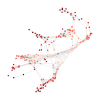

In [6]:
# Definir el punto central en el espacio 2D
center = (0.5, 0.5)

# Encontrar el nodo más cercano al punto central
ncenter, dmin = find_nearest_center(pos, center)

# Calcular las distancias más cortas desde el nodo central a todos los demás nodos
distances = dijkstra_shortest_paths(g, ncenter).dists

# Encontrar la distancia máxima para normalizar los colores
maximo = maximum(distances)

# Asignar colores a los nodos en función de su distancia al nodo central
nodefillc = [get(ColorSchemes.Reds, i / maximo) for i in distances]

gplot(g, 
    nodefillc=nodefillc)  # Los colores de los nodos se basan en las distancias calculadas